#### Nama  : Farhan Dwi Pramana
#### NIM   : 2141720125
#### Absen : 11

# Ketentuan UTS

Berdasarkan pemaparan kasus, Anda diminta untuk,

  1. Pilih 5 citra plat nomor untuk setiap anggota kelompok dari dataset yang telah disediakan.

  2. Lakukan segmentasi pada citra plat nomor untuk memperjelas karakter pada plat nomor.

  3. Anda dapat menggunakan algortima K-Means seperti yang telah dijelaskan pada praktikum sebelumnya atau menggunakan algoritma klasterisasi yang lain.

  4. Anda diperkenankan untuk melakukan pra pengolahan data (preprocessing) pada citra seperti,

    *   Merubah color space
    *   Reduksi dimensi
    *   dsb

  5. Tampilkan perbandingan citra antara sebelum dan sesudah di segmentasi

Open Challange (Opsional)

  * Bagaimana cara melakukan evaluasi pada hasil segementasi?
  * Terapkan pada kasus ini!

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow # path cv2.imshow di google colab
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

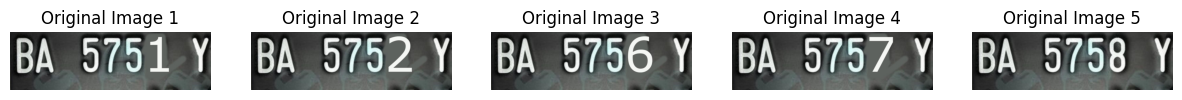

In [ ]:
import cv2
import matplotlib.pyplot as plt

# Daftar nama file gambar
image_files = ['/content/drive/MyDrive/img/farhan/BA5751Y_png.rf.f8c4c1738e1d2b5ed1c63f713adebedd.jpg',
               '/content/drive/MyDrive/img/farhan/BA5752Y_png.rf.dfa11688aa62c71d3d1fd87c3b5eae1e.jpg',
               '/content/drive/MyDrive/img/farhan/BA5756Y_png.rf.1a29f4624b29315d05239c45069a68d6.jpg',
               '/content/drive/MyDrive/img/farhan/BA5757Y_png.rf.e4e7557f9e1bff8c2d6d1b986714f6ea.jpg',
               '/content/drive/MyDrive/img/farhan/BA5758Y_png.rf.d598c9b574971572f931ae8eb75564ed.jpg']

img = [cv2.imread(image_file) for image_file in image_files]

def show_images(img, titles, figsize=(15, 7)):
    plt.figure(figsize=figsize)
    for i in range(len(img)):
        plt.subplot(1, len(img), i+1)
        # Convert image color space from BGR to RGB
        img_rgb = cv2.cvtColor(img[i], cv2.COLOR_BGR2RGB)
        plt.imshow(img_rgb)
        plt.title(titles[i])
        plt.axis('off')
    plt.show()

# List of titles for each image
titles = ['Original Image 1', 'Original Image 2', 'Original Image 3', 'Original Image 4', 'Original Image 5']

# Display the images
show_images(img, titles)


In [ ]:
for image_file in image_files:
    # Load gambar
    img = cv2.imread(image_file)

    # Ukuran Gambar
    h, w, ch= img.shape
    print("Height:", h)
    print("Width:", w)
    print("Channels:", ch)

Height: 343
Width: 1183
Channels: 3
Height: 343
Width: 1183
Channels: 3
Height: 343
Width: 1183
Channels: 3
Height: 343
Width: 1183
Channels: 3
Height: 343
Width: 1183
Channels: 3


In [ ]:
for image_file in image_files:
    # Load gambar
    img = cv2.imread(image_file)

    data = img / 255.0
    data = data.reshape(h * w, ch)
    print("Data Shape", data.shape)

Data Shape (405769, 3)
Data Shape (405769, 3)
Data Shape (405769, 3)
Data Shape (405769, 3)
Data Shape (405769, 3)


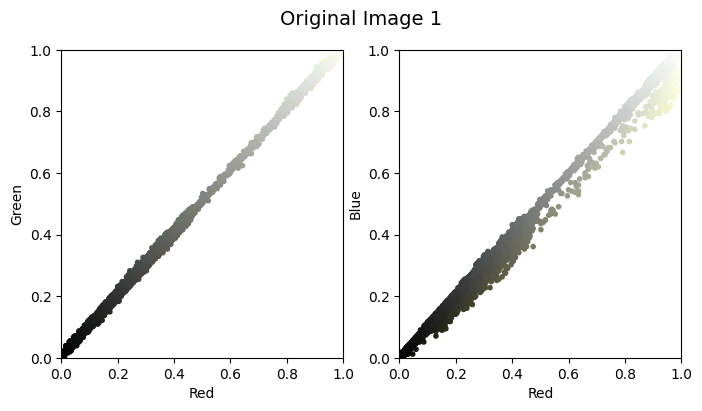

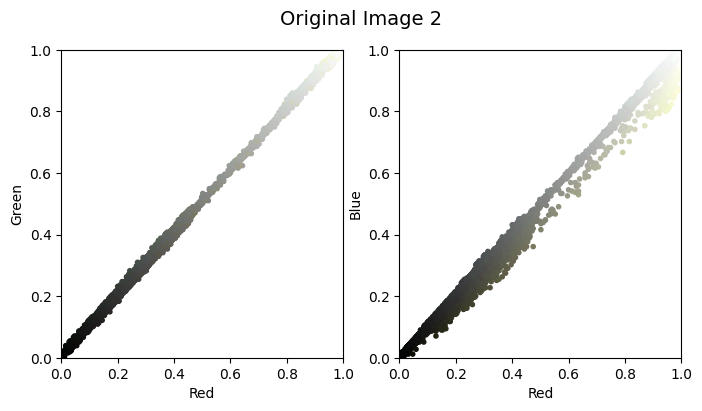

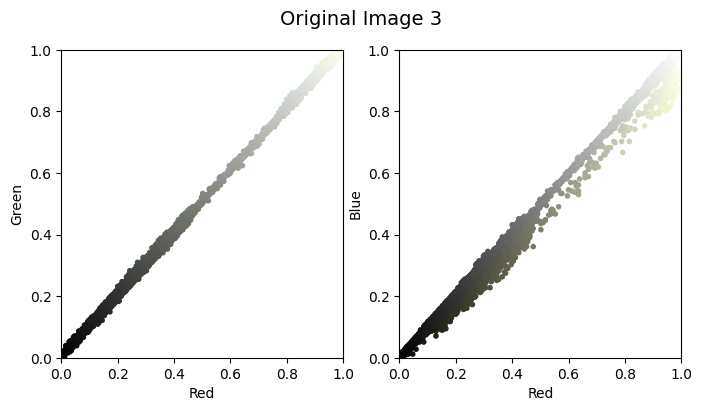

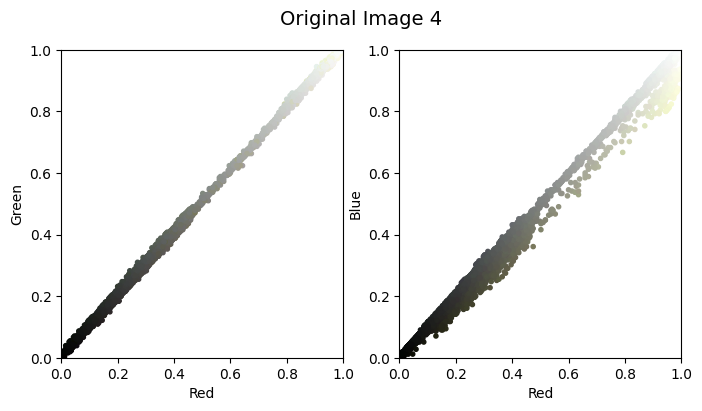

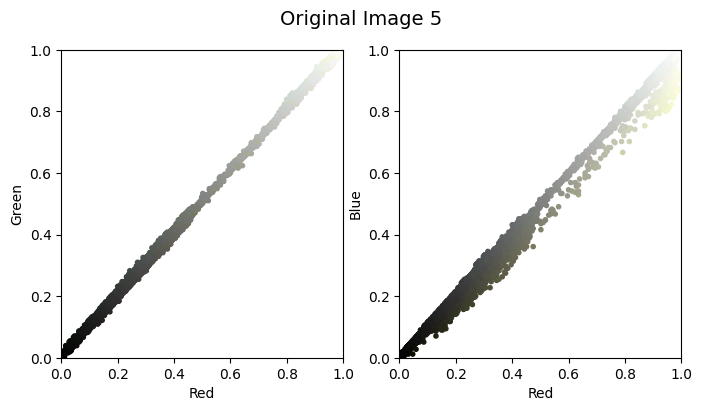

In [ ]:
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data

    # choose a random subset
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T

    fig, ax = plt.subplots(1, 2, figsize=(8, 4))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=14)

for i in range(5):
  plot_pixels(data, titles[i])

plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


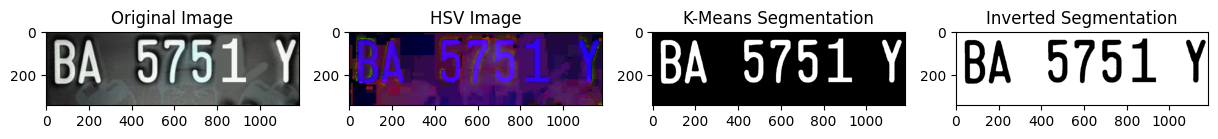

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


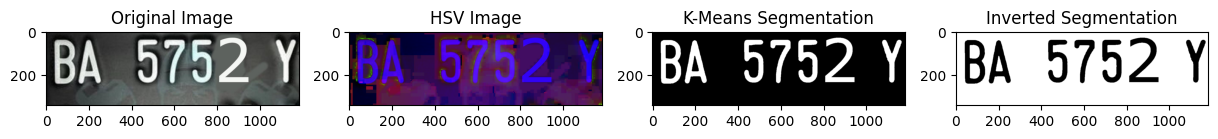

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


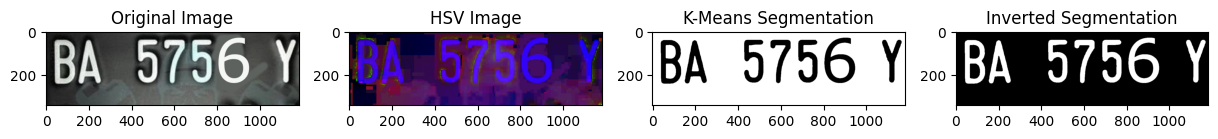

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


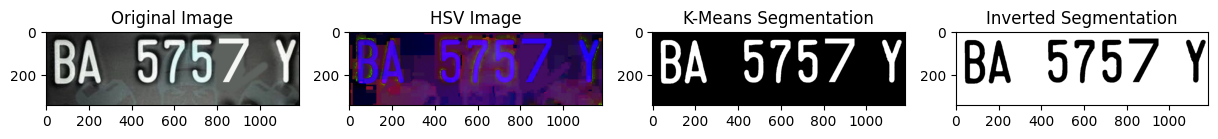

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


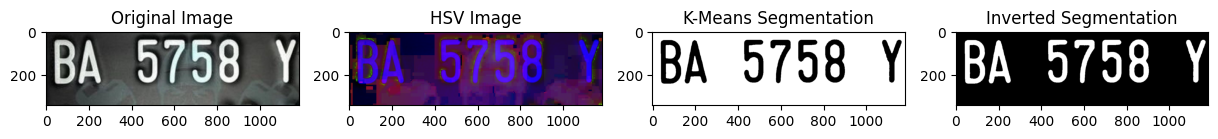

In [ ]:
import cv2
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

for i in range(5):
    # Load gambar
    img = cv2.imread(image_files[i])

    # Pre-processing: Konversi ke ruang warna HSV
    img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

    # Ukuran Gambar setelah pre-processing
    h, w, ch = img_hsv.shape

    # Normalisasi data
    data = img_hsv / 255.0

    # Reshape data
    data = data.reshape(h * w, ch)

    # Tampilkan citra asli
    plt.figure(figsize=(15, 4))

    plt.subplot(1, 4, 1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title('Original Image')

    # Tampilkan citra hasil pre-processing
    plt.subplot(1, 4, 2)
    plt.imshow(img_hsv)
    plt.title('HSV Image')

    # K-Means Segmentation
    kmeans = KMeans(n_clusters=2)
    kmeans.fit(data)
    segmented_img = kmeans.labels_.reshape(h, w)

    # Inversi warna pada hasil segmentasi
    inverted_segmented_img = 1 - segmented_img

    # Tampilkan hasil segmentasi
    plt.subplot(1, 4, 3)
    plt.imshow(segmented_img, cmap='gray')
    plt.title('K-Means Segmentation')

    # Tampilkan hasil inversi warna pada hasil segmentasi
    plt.subplot(1, 4, 4)
    plt.imshow(inverted_segmented_img, cmap='gray')
    plt.title('Inverted Segmentation')

    plt.show()
